## Credit Card Analysis of Defaults




Data Dictionary:
- dpnm: whether or not the customer defaulted on their credit card (i.e., failed to make a payment and the account was closed). defaulted=1, not defaulted=0
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_1 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005).
- PAY_1 = the repayment status in September, 2005
- PAY_2 = the repayment status in August, 2005
- PAY_3 = the repayment status in July, 2005. . . etc back to PAY_6 = the repayment status in April, 2005.
- The measurement scale for PAY_1 through PAY_6 is:
     
    -2 = paid ahead by two months
    
    -1 = paid ahead by one month
    
    -0 = payment on-time
    
    -1 = behind by one month
    
     -2 = behind by two months; etc.
     
BILL_AMT1 through BILL_AMT6: Amount of bill statement (Taiwanese NT dollar) from September 2005 (BILL_AMT1) through April 2005 (BILL_AMT6)
 
PAY_AMT1 through PAY_AMT6: Amount of previous payment (NT dollar) from September 2005 (BILL_AMT1) through April 2005 (BILL_AMT6)

     

Goal of this notebook is to categorize "dpnm", as in find who defaults (dpnm = 1), and who does not (dpnm = 0)

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('creditcard.csv')

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
# No null values, good start
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

In [5]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [6]:
##Education levels are only defined 1-4
df.drop(df[df['EDUCATION'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 5].index, inplace = True)
df.drop(df[df['EDUCATION'] == 6].index, inplace = True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

In [7]:
df['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64

In [8]:
## 0 is never defined in marriage column, drop rows
df.drop(df[df['MARRIAGE'] == 0].index, inplace = True)
df['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

## Binary encoding categorical data

In [9]:
df2 = df.copy()

In [10]:
##Creates categorical columns for Sex data
temp = pd.get_dummies(df.SEX, drop_first = True)
temp.columns=['Female']
df2 = pd.concat([df2, temp], axis=1)
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm,Female
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [11]:
##Creates categorical columns for Marriage data
temp = pd.get_dummies(df.MARRIAGE, drop_first = False)
temp.columns=['Married', 'Single', 'OtherMarried']
df2 = pd.concat([df2, temp], axis=1)
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm,Female,Married,Single,OtherMarried
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,1,1,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,1,0,1,0
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,1,0,1,0
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,1,1,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,0,1,0,0


In [12]:
##Creates categorical columns for Education data
temp = pd.get_dummies(df.EDUCATION, drop_first = False)
temp.columns=['Graduate School', 'University', 'High School', 'OtherSchool']
df2 = pd.concat([df2, temp], axis=1)
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,dpnm,Female,Married,Single,OtherMarried,Graduate School,University,High School,OtherSchool
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,1,1,1,0,0,0,1,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2000,1,1,0,1,0,0,1,0,0
2,3,90000,2,2,2,34,0,0,0,0,...,5000,0,1,0,1,0,0,1,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,1000,0,1,1,0,0,0,1,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,679,0,0,1,0,0,0,1,0,0


## Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0d5646f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0d565e8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0d5646c18>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0d565ef60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0d565ef28>],
 'means': []}

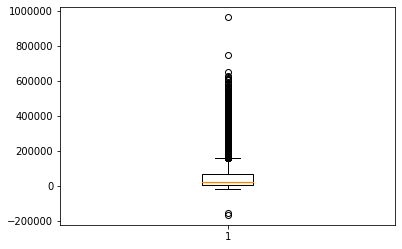

In [13]:
plt.boxplot(df2.BILL_AMT1)

In [14]:
print(df2.BILL_AMT1.median())
print(df2.BILL_AMT1.mean())

22259.0
50957.432012432015


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0d56f0e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0d56ff588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0d56f0a58>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0d56ffc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0d56fff60>],
 'means': []}

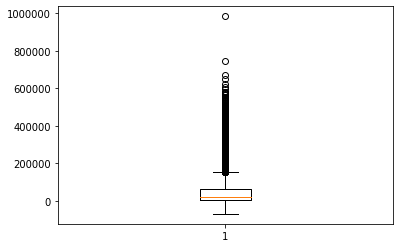

In [15]:
plt.boxplot(df2.BILL_AMT2)

plt.boxplot(df2.LIMIT_BAL)

In [16]:
print(df2.LIMIT_BAL.median())
print(df2.LIMIT_BAL.mean())

140000.0
167550.54491402316


The box plots indicate that there are a large number of outliers. However, this is not necessarily a bad thing. Removing each all the outliers would skew the data to a greater degree than leaving them in. Removing an outlier on the basis that is that it IS an outlier is incorrect analysis. Outlier removal should be reserved for values that are clearly data entry errors or massively skew a data set many magnitudes. Since there is such an abundance, the fact that the data points were labeled outliers in the first place must be explainable by other factors

## Feature engineering

Goal here is to create a few features that might help us in creating a better model

In [17]:
pd.crosstab(df2.dpnm, df2.Female)

Female,0,1
dpnm,,
0,8885,14111
1,2861,3744


- 2861 Males of 11746 (24.38%) defaulted on their their Credit Card
-  3744 Females of 17855 (20.97%) defaulted on their Credit Card

In [18]:
pd.crosstab(df2.dpnm, df2.EDUCATION)

EDUCATION,1,2,3,4
dpnm,,,,
0,8545,10695,3640,116
1,2036,3329,1233,7


In [19]:
##Assume the Limit balance is per month
## Feature will be ratio of averge bill per month relative to spending limit
df2['avgBILL_AMT'] = df2['BILL_AMT1'] + df2['BILL_AMT2']+ df2['BILL_AMT3'] + df2['BILL_AMT4'] + df2['BILL_AMT5'] + df2['BILL_AMT6'] / 6
df2['spend_ratio'] = df2['avgBILL_AMT'] / df2['LIMIT_BAL']

In [20]:
df2.spend_ratio

0        0.385200
1        0.119663
2        0.985506
3        4.134230
4        1.867930
5        4.428547
6        4.659283
7        0.130135
8        0.443663
9        0.766283
10       0.156789
11       0.296073
12       0.061294
13       4.399143
14       1.309324
15       3.424803
16       4.512050
17       2.509421
18       0.000000
19       0.000000
20       0.946985
21       0.013606
22       3.244738
23       0.059922
24       0.277267
25       3.785133
26      -0.003942
27       1.918410
28       0.799877
29       1.751640
           ...   
29970    0.587050
29971    4.421296
29972    0.641979
29973    0.000000
29974    0.583993
29975    0.287595
29976    6.672433
29977    1.713962
29978    3.809950
29979    0.000000
29980    4.322627
29981    3.237063
29982    0.588024
29983    0.990475
29984    0.287672
29985    0.000000
29986    0.006167
29987    2.083812
29988    4.905323
29989    0.088073
29990    4.358577
29991    0.061508
29992    1.920200
29993    2.567313
29994    5

In [21]:
##Feature will be the amount of the total bill paid back
df2['totalPAY_AMT'] = df2['PAY_AMT1'] + df2['PAY_AMT2'] + df2['PAY_AMT3'] + df2['PAY_AMT4'] + df2['PAY_AMT5'] + df2['PAY_AMT6']
df2['totalBILL_AMT'] = df2['BILL_AMT1'] + df2['BILL_AMT2'] + df2['BILL_AMT3'] + df2['BILL_AMT4'] + df2['BILL_AMT5'] + df2['BILL_AMT6']

In [22]:
df2['total_PMT'] = df2['totalBILL_AMT'] - df2['totalPAY_AMT']

In [23]:
df2.total_PMT

0           7015
1          12077
2          90635
3         222946
4          50290
5         230342
6        2543836
7           8695
8          58451
9          12790
10         27995
11         22061
12         17637
13        327985
14        355591
15        190216
16         99811
17        604117
18             0
19             0
20         81652
21           316
22        254465
23          4376
24         15464
25        206404
26         -2894
27        105156
28           641
29         90482
          ...   
29970      65467
29971     398366
29972      51317
29973          0
29974      25303
29975      32779
29976     296489
29977     807559
29978    1301223
29979          0
29980     204043
29981     168454
29982      56663
29983        -46
29984      -1879
29985          0
29986       2220
29987     240991
29988    1274250
29989       3374
29990     625902
29991      15000
29992      17202
29993     177784
29994     449433
29995     682799
29996       6692
29997      391

In [24]:
df2.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'dpnm',
 'Female',
 'Married',
 'Single',
 'OtherMarried',
 'Graduate School',
 'University',
 'High School',
 'OtherSchool',
 'avgBILL_AMT',
 'spend_ratio',
 'totalPAY_AMT',
 'totalBILL_AMT',
 'total_PMT']

## Decision Tree


The features chosen for the decison tree include, gender, (Female column), age, the average spending ratio, and the total amount of the bill remaining after the 6 month period.

In [25]:
from sklearn import tree
columns = ['dpnm', 'AGE', 'Female', 'spend_ratio', 'total_PMT']
df3 = df2[columns].dropna().copy()

X = df3[['AGE', 'Female', 'spend_ratio',  'total_PMT']].copy()
y = df3.dpnm

# depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,y)

/Users/KyleMontera/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


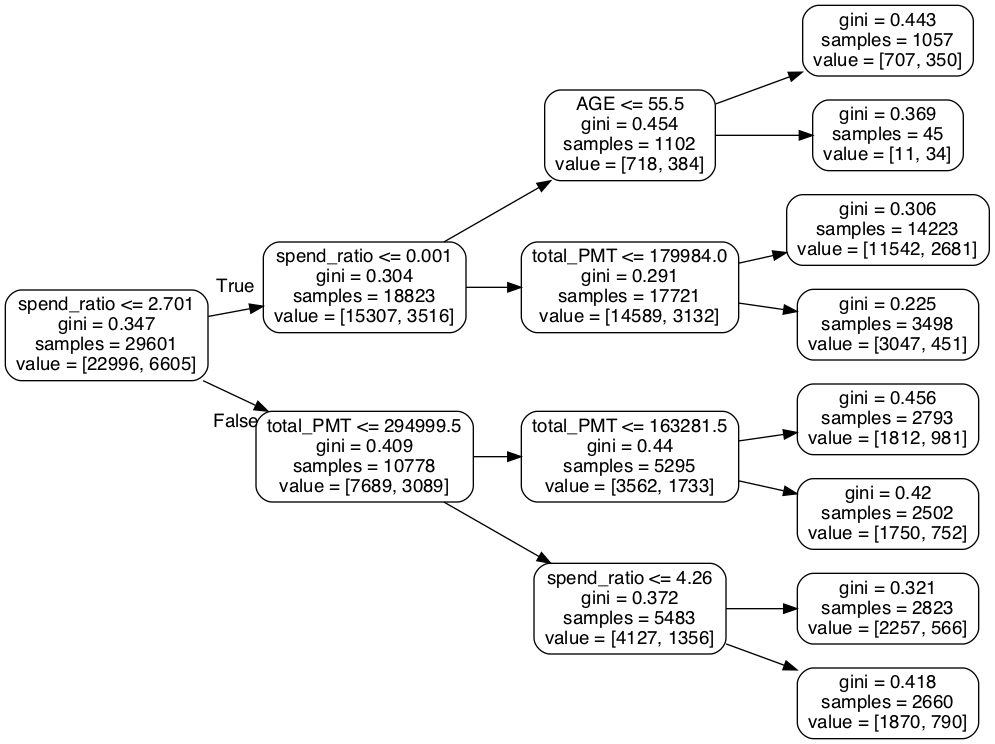

In [26]:
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [27]:
# And, how accurate is our model?
accuracy = clf.score(X,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 77.76% accurate.


## Random Forest Analysis

The purpose of Forest analysis is to test accuracy results across a large number of generated trees.

We will be dividing the data set into a 70% training set, and a 30% testing set. The training set will be used to train our model, and the remaining 30% will be used to see how the model performs against data it has never seen. 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, \
        test_size = 0.3, random_state = 42) # reminder: random_state will ensure you get the same results

In [29]:
from sklearn.ensemble import RandomForestClassifier

# generate 10 decision trees
clf = RandomForestClassifier(n_estimators=10, verbose=0, bootstrap=True, max_depth=3, random_state=42) 
clf = clf.fit(X_train,y_train)

preds = clf.predict(X_train)
probs = clf.predict_proba(X_train)
accuracy = round(clf.score(X_train,y_train)*100,2) # make it a percentage and round to 2 places
print(accuracy)

77.88


In [30]:
print(clf.feature_importances_)

[0.06687315 0.03545111 0.64911617 0.24855957]


The above numbers idicate the relative power of the features in the model 

- Age: 6%
- Female (Gender): 3%
- Spending Ratio: 65%
- Total Bill remaining: 25%

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, preds)

array([[16137,     0],
       [ 4583,     0]])

The matrix represents as follows

- The upper left and lower right numbers represents correct predictions, while the upper right and lower left numbers reperesnt incorrect predictions. 
- The model incorrectly predicted that 4583 people defaulted on their credit card. The model correctly guessed that 16137 people did not default on their credit card. 

The accuracy of the tree is as follows : (16137) / (16137+4583) = 77.88% 

Next, the 30% testing set will be fed into the model to test for generalizability

In [32]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)
accuracy = round(clf.score(X_test,y_test)*100,2) # make it a percentage and round to 2 places
print(accuracy)

77.23


In [33]:
confusion_matrix(y_test, preds)

array([[6859,    0],
       [2022,    0]])

The matrix above returns an accuracy of 77.23%, pretty close to the testing set. This means that we model that will generalize, and can classify those who defaulted on their credit cards with the aforemention features very close to 4 of 5 times correctly

## Making predictions using the model

In [34]:
# Reminder of our X features:
#'AGE', 'Female', Spend Ratio, Bill Amount'
# The following predicts the likelihood for a 30 year old woman who is married, spends an average of 90% of her credit limit monthly, and has a bill of 30000 remaining after the 6 month period
print('if 0= no default and 1=default, the model predicts:', clf.predict([[30, 1, .90, 30000]]))
print('with a probabilities of: ', clf.predict_proba([[30, 1, .90, 30000]]))


if 0= no default and 1=default, the model predicts: [0]
with a probabilities of:  [[0.80749942 0.19250058]]


The model predicts that this person will not default on their credit card, and is 80% confident in the result